## Dengue Forecast Models

#### Importing the data

In [1]:
import pandas as pd
import numpy as np

features_independet_variables = 'DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv'
feature_dependent_variable = 'DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv'
google_trend = 'google_trends_dengue.csv'

df_independent_variables = pd.read_csv(features_independet_variables)
df_dependent_variable = pd.read_csv(feature_dependent_variable)
df_google_trend = pd.read_csv(google_trend)

In [2]:
df_independent_variables.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df_dependent_variable.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
df_google_trend.head()

,Week,dengue
0,2004-01-04,0
1,2004-01-11,0
2,2004-01-18,0
3,2004-01-25,0
4,2004-02-01,0


#### Applying filters

In [5]:
#Considering only the city of San Juan and cases starting in 2004
df_independent_variables = df_independent_variables[(df_independent_variables.city == 'sj') & 
                                                    (df_independent_variables.year >= 2004)]

In [6]:
df_dependent_variable = df_dependent_variable[(df_dependent_variable.city == 'sj') &
                                             (df_dependent_variable.year >= 2004)]

In [7]:
df_independent_variables.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

#### Data Cleaning

In [8]:
# Selecting features
df_independent_variables_2 = df_independent_variables[['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
                          'reanalysis_relative_humidity_percent', 'station_avg_temp_c']]

In [9]:
df_independent_variables_2.head()

,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_relative_humidity_percent,station_avg_temp_c
711,sj,2004,1,2004-01-01,NaN,NaN,NaN
712,sj,2004,2,2004-01-08,0.00,72.577143,24.385714
713,sj,2004,3,2004-01-15,36.07,78.942857,24.342857
714,sj,2004,4,2004-01-22,0.00,78.264286,24.528571
715,sj,2004,5,2004-01-29,0.00,75.422857,24.628571


In [10]:
# Checking null values
print (df_independent_variables_2.isnull().sum())

city                                    0
year                                    0
weekofyear                              0
week_start_date                         0
precipitation_amt_mm                    2
reanalysis_relative_humidity_percent    2
station_avg_temp_c                      2
dtype: int64


In [11]:
print (df_dependent_variable.isnull().sum())

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64


In [12]:
print (df_google_trend.isnull().sum())

Week      0
dengue    0
dtype: int64


In [13]:
# Filling null values with the mean

precipitation_amt_mm_mean = round(df_independent_variables_2['precipitation_amt_mm'].mean(),2)
reanalysis_relative_humidity_percent_mean = round(df_independent_variables_2['reanalysis_relative_humidity_percent'].mean(), 6)
station_avg_temp_c_mean = round(df_independent_variables_2['station_avg_temp_c'].mean(), 6)

values = {'precipitation_amt_mm': precipitation_amt_mm_mean, 
          'reanalysis_relative_humidity_percent': reanalysis_relative_humidity_percent_mean,
          'station_avg_temp_c': station_avg_temp_c_mean}

df_independent_variables_2 = df_independent_variables_2.fillna(value = values)

#### Joining the datasets

In [14]:
df_google_trend.dtypes

Week      object
dengue     int64
dtype: object

In [15]:
#Joining datasets with the independent and dependent features

complete_dataset = df_independent_variables_2.merge(df_dependent_variable, on=['weekofyear', 'year'],
                                                   how = 'inner')

In [16]:
# Droping similar column between datasets
complete_dataset = complete_dataset.drop(labels='city_y', axis=1)

In [17]:
#Adding columns to the Google Trends dataset for merging
df_google_trend['Week'] = pd.to_datetime(df_google_trend['Week'])
df_google_trend['year'] = df_google_trend['Week'].dt.year

In [18]:
#Adding number of weeks for each year (we don't have this variable on Google trends dataset)

count_weeks = df_google_trend.groupby(['year']).size()
df_google_trend['weekofyear'] = 0

for year in count_weeks.index:
    list_weeks = np.arange(1, count_weeks[year] + 1)
    df_google_trend.loc[df_google_trend['year'] == year, 'weekofyear'] = list_weeks

In [19]:
df_google_trend.head()

,Week,dengue,year,weekofyear
0,2004-01-04,0,2004,1
1,2004-01-11,0,2004,2
2,2004-01-18,0,2004,3
3,2004-01-25,0,2004,4
4,2004-02-01,0,2004,5


In [20]:
#Joining dataset with the Google Trend dataset
# In this join operation I realized that 1 row did not match. I investigated it and it was an invalide row on the dataset

complete_dataset = complete_dataset.merge(df_google_trend, on=['year', 'weekofyear'], how='inner')

In [21]:
complete_dataset.head()

,city_x,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_relative_humidity_percent,station_avg_temp_c,total_cases,Week,dengue
0,sj,2004,1,2004-01-01,36.35,77.292902,26.885522,15,2004-01-04,0
1,sj,2004,2,2004-01-08,0.00,72.577143,24.385714,20,2004-01-11,0
2,sj,2004,3,2004-01-15,36.07,78.942857,24.342857,14,2004-01-18,0
3,sj,2004,4,2004-01-22,0.00,78.264286,24.528571,10,2004-01-25,0
4,sj,2004,5,2004-01-29,0.00,75.422857,24.628571,21,2004-02-01,0


In [22]:
# Renaming some columns and drop others

complete_dataset['google_trends'] = complete_dataset['dengue']

complete_dataset = complete_dataset.drop(labels=['city_x', 'dengue', 'Week'], axis=1)


#### Feature Engineering

In [23]:
def leg_data_calculations (start_index,number_of_legs, aggregation_type, data_set, field):    
    #variable for the leg calculated column
    new_column = field + "_leg_" + str(number_of_legs)
    data_set[new_column] = 0 

    for index in range(start_index, len(data_set)):
        # -1 because I don't include the current week and - number of legs
        start_index_week = (index-1) - number_of_legs

        # -1 because I don't include the current week
        end_index_week = index-1
    
        if aggregation_type == "sum": 
            aggregated_variable = data_set.loc[start_index_week:end_index_week][field].sum()
        elif aggregation_type == "mean":     
            aggregated_variable = data_set.loc[start_index_week:end_index_week][field].mean()
    
        data_set.loc[index,new_column] = aggregated_variable
        
        index += 1

'''Creating variables considering a lag of 9-16 weeks (based on liteture) for the weather variables --- 
this lag comprehends the time for the mosquito development and incubation'''        

starting_point = 17

for leg in range (9, 17):
    
    leg_data_calculations (start_index = starting_point, number_of_legs = leg, aggregation_type = "sum", 
                           data_set = complete_dataset, field = "precipitation_amt_mm") 

    leg_data_calculations (start_index = starting_point, number_of_legs = leg, aggregation_type = "mean", 
                           data_set = complete_dataset, field = "reanalysis_relative_humidity_percent") 

    leg_data_calculations (start_index = starting_point, number_of_legs = leg, aggregation_type = "mean", 
                           data_set = complete_dataset, field = "station_avg_temp_c") 

    leg_data_calculations (start_index = starting_point, number_of_legs = leg, aggregation_type = "sum", 
                           data_set = complete_dataset, field = "precipitation_amt_mm") 

# Calculating leg for the Google Trends (Ranging from 1 to 4 weeks)    
for leg in range (1, 5):
    leg_data_calculations (start_index = starting_point, number_of_legs = leg, aggregation_type = "sum", 
                           data_set = complete_dataset, field = "google_trends") 

In [24]:
# Deleting the first 16 rows as we don't have previous 16 weeks

complete_dataset = complete_dataset.drop(complete_dataset.index[0:starting_point], axis=0)

In [25]:
# Checking correlation between weather variables and number of cases
# Renaming the columns for fitting better on the graph

df_correlations = pd.DataFrame()

for leg in range (9, 17):
    df_correlations["preciptation_" + str(leg)] = complete_dataset["precipitation_amt_mm_leg_" + str(leg)]
    df_correlations["temperature_" + str(leg)] = complete_dataset["station_avg_temp_c_leg_" + str(leg)]
    df_correlations["humidity_" + str(leg)] = complete_dataset["reanalysis_relative_humidity_percent_leg_" + str(leg)]

for leg in range (1, 5):
    df_correlations['search_trends_' + str(leg)] = complete_dataset['google_trends_leg_' + str(leg)]
    
df_correlations['total'] = complete_dataset['total_cases']

In [26]:
correlation_results =  df_correlations.corr().loc[['total']]

# Getting the max correlations for each one of the calculated legs
max_correlations = []

preciptations_cols = [col for col in correlation_results if col.startswith('preciptation')]
max_correlations.append (correlation_results[preciptations_cols].transpose().sort_values('total', ascending = False).head(1).index[0])

temperature_cols = [col for col in correlation_results if col.startswith('temperature')]
max_correlations.append (correlation_results[temperature_cols].transpose().sort_values('total', ascending = False).head(1).index[0])

humidity_cols = [col for col in correlation_results if col.startswith('humidity')]
max_correlations.append (correlation_results[humidity_cols].transpose().sort_values('total', ascending = False).head(1).index[0])

#search_trends_cols = [col for col in correlation_results if col.startswith('search_trends')]
#max_correlations.append (correlation_results[search_trends_cols].transpose().sort_values('total', ascending = False).head(1).index[0])

max_correlations.append ('search_trends_2')

#features with the highest correlations
max_correlations.append('total')

df_correlations[max_correlations].corr().sort_values('total', ascending=False)

,preciptation_16,temperature_14,humidity_14,search_trends_2,total
total,0.429748,0.591675,0.251439,0.601393,1.000000
search_trends_2,0.251376,0.420403,0.029028,1.000000,0.601393
temperature_14,0.755646,1.000000,0.636316,0.420403,0.591675
preciptation_16,1.000000,0.755646,0.719886,0.251376,0.429748
humidity_14,0.719886,0.636316,1.000000,0.029028,0.251439


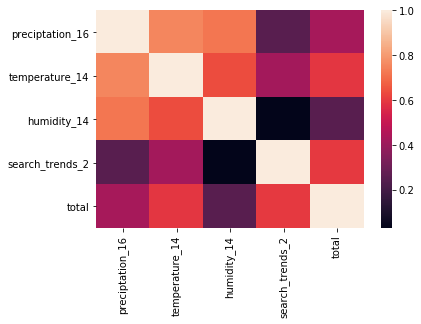

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(df_correlations[max_correlations].corr())

#### Machine Learning 

Based on the correlations we are going to consider the fields: preciptation, temperature and search trends

In [28]:
machine_learning_features_df = df_correlations[max_correlations]

In [29]:
machine_learning_features_df = machine_learning_features_df.drop(labels=['humidity_14'], axis=1)

In [30]:
machine_learning_features_df.head()

,preciptation_16,temperature_14,search_trends_2,total
17,130.11,25.114286,0,10
18,169.04,25.235238,0,7
19,178.61,25.351429,28,5
20,158.32,25.491429,28,3
21,255.31,25.561905,28,12


In [31]:
# Spliting the dataset between idenpendent and dependent variables

idenpendent_variables_with_google_search = machine_learning_features_df.iloc[:, 0:3].values
dependent_variable = machine_learning_features_df.iloc[:, 3].values

idenpendent_variables_without_google_search = machine_learning_features_df.iloc[:, 0:2].values

In [32]:
def svm_model (kernel, x, y, y_test):
    #Fitting SVM to the training dataset
    from sklearn.svm import SVC
    classifier = SVC(kernel= kernel, random_state = 0, C = 1)
    classifier.fit(x, y)

    #Predicting the test results
    prediction = classifier.predict(y_test)
    
    return prediction

In [33]:
# Spliting the dataset into the training and test
from sklearn.cross_validation import train_test_split

#first spilit of variables for the case with Google search
idenpendent_variables_google_train, idenpendent_variables_google_test, dependent_variable_train, dependent_variable_test = train_test_split(idenpendent_variables_with_google_search, 
                                                                                                                              dependent_variable, 
                                                                                                                              test_size=0.25,
                                                                                                                              random_state=0) 

#second spilit of variables for the case without Google search
idenpendent_variables_without_google_train, idenpendent_variables_without_google_test, dependent_variable_train, dependent_variable_test = train_test_split(idenpendent_variables_without_google_search, 
                                                                                                                              dependent_variable, 
                                                                                                                              test_size=0.25,
                                                                                                                              random_state=0) 
# Feature Scaling : Scaling the values for one not dominating the other (with Google Search)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
idenpendent_variables_google_train = sc.fit_transform(idenpendent_variables_google_train)
idenpendent_variables_google_test = sc.transform(idenpendent_variables_google_test)

# Feature Scaling : Scaling the values for one not dominating the other (without Google Search)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
idenpendent_variables_without_google_train = sc.fit_transform(idenpendent_variables_without_google_train)
idenpendent_variables_without_google_test = sc.transform(idenpendent_variables_without_google_test)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
# Fitting the models

predictor_rbf_with_google = svm_model('rbf', idenpendent_variables_google_train, dependent_variable_train, 
                                      idenpendent_variables_google_test)

predictor_rbf_without_google = svm_model('rbf', idenpendent_variables_without_google_train, dependent_variable_train, 
                                         idenpendent_variables_without_google_test)

predictor_linear_with_google = svm_model('linear', idenpendent_variables_google_train, dependent_variable_train, 
                                      idenpendent_variables_google_test)

predictor_linear_without_google = svm_model('linear', idenpendent_variables_without_google_train, dependent_variable_train, 
                                         idenpendent_variables_without_google_test)


predictor_poly_with_google = svm_model('poly', idenpendent_variables_google_train, dependent_variable_train, 
                                      idenpendent_variables_google_test)

predictor_poly_without_google = svm_model('poly', idenpendent_variables_without_google_train, dependent_variable_train, 
                                         idenpendent_variables_without_google_test)



# Calculation the MAE (Mean Absolute Error for the Models)
from sklearn.metrics import mean_absolute_error

mae_rbf_with_google = mean_absolute_error(dependent_variable_test, predictor_rbf_with_google)
mae_rbf_without_google = mean_absolute_error(dependent_variable_test, predictor_rbf_without_google)

mae_linear_with_google = mean_absolute_error(dependent_variable_test, predictor_linear_with_google)
mae_linear_without_google = mean_absolute_error(dependent_variable_test, predictor_linear_without_google)

mae_poly_with_google = mean_absolute_error(dependent_variable_test, predictor_poly_with_google)
mae_poly_without_google = mean_absolute_error(dependent_variable_test, predictor_poly_without_google)

In [35]:
print ("MAE (SVM-RBF) with Google search interest: ", round(mae_rbf_with_google,2))
print ("MAE (SVM-RBF) without Google search interest: ", round(mae_rbf_without_google,2))
print ("\n") 
print ("MAE (SVM-Linear) with Google search interest: ", round(mae_linear_with_google,2))
print ("MAE (SVM-Linear) without Google search interest: ", round(mae_linear_without_google,2))
print ("\n")
print ("MAE (SVM-Poly) with Google search interest: ", round(mae_poly_with_google,2))
print ("MAE (SVM-Poly) without Google search interest: ", round(mae_poly_without_google,2))

MAE (SVM-RBF) with Google search interest:  12.98
MAE (SVM-RBF) without Google search interest:  14.12


MAE (SVM-Linear) with Google search interest:  11.13
MAE (SVM-Linear) without Google search interest:  13.52


MAE (SVM-Poly) with Google search interest:  12.35
MAE (SVM-Poly) without Google search interest:  12.23


In [36]:
print("Performance Improvement (Linear Model) = ", round(mae_linear_without_google - mae_linear_with_google,2))

Performance Improvement (Linear Model) =  2.38
